#### This notebook is used for Stevens BIA660 - Web Analytics project, data source: Consumer  Financial Protection Bureau. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv("ComsumerComplaints.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985957 entries, 0 to 985956
Data columns (total 19 columns):
Unnamed: 0                   985957 non-null int64
company                      985957 non-null object
company_public_response      298217 non-null object
company_response             985955 non-null object
complaint_id                 985957 non-null int64
narratives                   256666 non-null object
consumer_consent_provided    456861 non-null object
consumer_disputed            768568 non-null object
date_received                985957 non-null object
date_sent_to_company         985957 non-null object
issue                        985957 non-null object
product                      985957 non-null object
state                        968668 non-null object
sub_issue                    495323 non-null object
sub_product                  750787 non-null object
submitted_via                985957 non-null object
tags                         136828 non-null object
timely 

- In total, we have 985957 records including all categories. 

In [3]:
#remove the first unidefined column
df = df.drop(df.columns[0], axis = 1)

In [4]:
df.shape
#df.head()

(985957, 18)

In [5]:
#save a copy of raw data in case of further use
raw_df = df.copy()

In [6]:
#keep narratives which are not null
df1 = raw_df[~raw_df['narratives'].isnull()]
df1.shape

(256666, 18)

- After removing all NA/N records in "narrative" columns, we have 25666 records in total.

In [7]:
#remove duplicate narratives but keep the first one
df2 = df1.drop_duplicates('narratives',keep = "first")
df2.shape

(248614, 18)

- After removing duplicate records, we have 248614 records in total.

In [8]:
df2.head()

,company,company_public_response,company_response,complaint_id,narratives,consumer_consent_provided,consumer_disputed,date_received,date_sent_to_company,issue,product,state,sub_issue,sub_product,submitted_via,tags,timely,zip_code
2,"Alpine Credit, Inc",Company disputes the facts presented in the co...,Closed with explanation,2383241,I have not been contacted about this negative ...,Consent provided,No,2017-03-13T00:00:00.000,2017-03-15T00:00:00.000,Cont'd attempts collect debt not owed,Debt collection,AR,Debt was paid,I do not know,Web,NaN,No,729XX
18,Experian Information Solutions Inc.,Company has responded to the consumer and the ...,Closed with explanation,2788944,There are many mistakes appear in my report wi...,Consent provided,NaN,2018-01-20T00:00:00.000,2018-01-20T00:00:00.000,Incorrect information on your report,"Credit reporting, credit repair services, or o...",MD,Account information incorrect,Credit reporting,Web,NaN,Yes,212XX
21,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Company has responded to the consumer and the ...,Closed with explanation,2773990,I was pulling my credit to looking into buying...,Consent provided,NaN,2018-01-06T00:00:00.000,2018-01-06T00:00:00.000,Incorrect information on your report,"Credit reporting, credit repair services, or o...",FL,Information belongs to someone else,Credit reporting,Web,NaN,Yes,347XX
29,"BANK OF AMERICA, NATIONAL ASSOCIATION",Company has responded to the consumer and the ...,Closed with explanation,2412744,I bought a money order from XXXX XXXX to pay a...,Consent provided,No,2017-03-31T00:00:00.000,2017-04-03T00:00:00.000,Lost or stolen money order,Other financial service,NY,NaN,Money order,Web,NaN,Yes,100XX
39,"Caliber Home Loans, Inc.",NaN,Closed with explanation,2737995,"Since XXXX XXXX, I was working with a loan con...",Consent provided,NaN,2017-11-26T00:00:00.000,2017-11-26T00:00:00.000,Applying for a mortgage or refinancing an exis...,Mortgage,MD,NaN,Conventional home mortgage,Web,NaN,Yes,208XX


#### Take a look at the relationship between product and issue

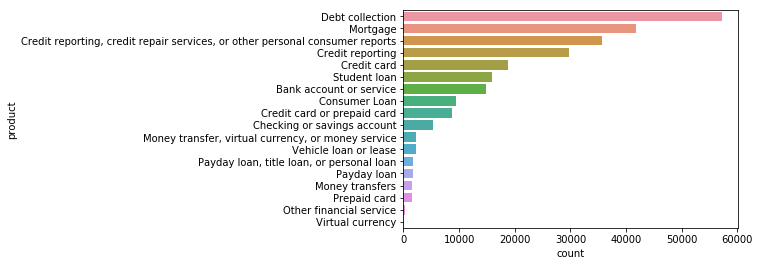

In [9]:
#Plot complaints amounts by products
sns.countplot(y = "product", data = df2,\
             order = df2['product'].value_counts().index)
plt.show()

In [10]:
#Percentage of top 6 product complaints
top6_percentage = df2['product'].value_counts()[:6].sum()/df2['product'].value_counts().sum()
print("Percentage of top 6 product complaints: ", top6_percentage)

#Get top6_products name
products_name = df2['product'].value_counts()[:6].index
products_name

#Create a dictionary of top 6 products
products = {}
for product in products_name:
    products[product] = df2[df2['product'] == product]

products

Percentage of top 6 product complaints:  0.8009685697506979


Index(['Debt collection', 'Mortgage',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Credit reporting', 'Credit card', 'Student loan'],
      dtype='object')

{'Credit card':                                              company  \
 45             BANK OF AMERICA, NATIONAL ASSOCIATION   
 68                            BARCLAYS BANK DELAWARE   
 94                            BARCLAYS BANK DELAWARE   
 111                           BARCLAYS BANK DELAWARE   
 215                           BARCLAYS BANK DELAWARE   
 470            BANK OF AMERICA, NATIONAL ASSOCIATION   
 683            BANK OF AMERICA, NATIONAL ASSOCIATION   
 983                           BARCLAYS BANK DELAWARE   
 984                           BARCLAYS BANK DELAWARE   
 997            BANK OF AMERICA, NATIONAL ASSOCIATION   
 1006                          BARCLAYS BANK DELAWARE   
 1019           BANK OF AMERICA, NATIONAL ASSOCIATION   
 1058                          BARCLAYS BANK DELAWARE   
 1070                            SUNTRUST BANKS, INC.   
 1088           BANK OF AMERICA, NATIONAL ASSOCIATION   
 1151                          BARCLAYS BANK DELAWARE   
 1168           

Index(['Cont'd attempts collect debt not owed', 'Communication tactics',
       'Attempts to collect debt not owed', 'Disclosure verification of debt',
       'False statements or representation', 'Written notification about debt',
       'Taking/threatening an illegal action',
       'Improper contact or sharing of info',
       'Took or threatened to take negative or legal action',
       'Threatened to contact someone or share information improperly'],
      dtype='object')


[Text(0,0.5,'Top 10 Issues'), Text(0.5,0,'Debt collection')]

<Figure size 504x360 with 0 Axes>

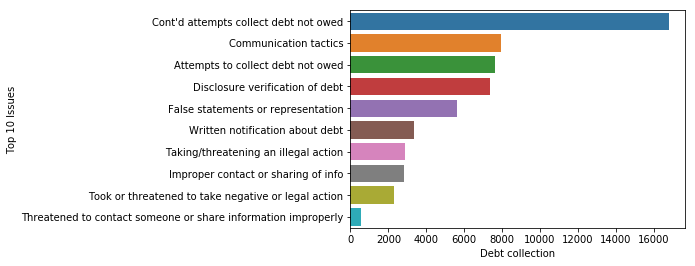

<Figure size 504x360 with 0 Axes>

Index(['Loan servicing, payments, escrow account',
       'Loan modification,collection,foreclosure',
       'Trouble during payment process',
       'Application, originator, mortgage broker',
       'Struggling to pay mortgage', 'Settlement process and costs',
       'Credit decision / Underwriting',
       'Applying for a mortgage or refinancing an existing mortgage',
       'Closing on a mortgage', 'Incorrect information on your report'],
      dtype='object')


[Text(0,0.5,'Top 10 Issues'), Text(0.5,0,'Mortgage')]

<Figure size 504x360 with 0 Axes>

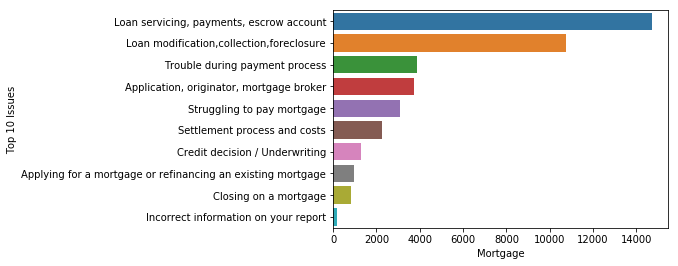

<Figure size 504x360 with 0 Axes>

Index(['Incorrect information on your report',
       'Problem with a credit reporting company's investigation into an existing problem',
       'Improper use of your report',
       'Problem with fraud alerts or security freezes',
       'Unable to get your credit report or credit score',
       'Credit monitoring or identity theft protection services',
       'Problem with a company's investigation into an existing issue',
       'Identity theft protection or other monitoring services',
       'Fraud or scam', 'Problem with customer service'],
      dtype='object')


[Text(0,0.5,'Top 10 Issues'),
 Text(0.5,0,'Credit reporting, credit repair services, or other personal consumer reports')]

<Figure size 504x360 with 0 Axes>

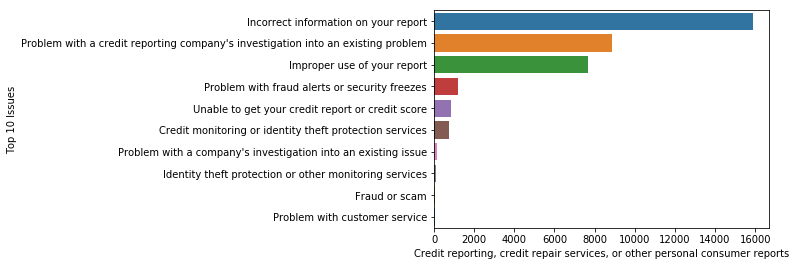

<Figure size 504x360 with 0 Axes>

Index(['Incorrect information on credit report',
       'Credit reporting company's investigation',
       'Unable to get credit report/credit score',
       'Improper use of my credit report',
       'Credit monitoring or identity protection'],
      dtype='object')


[Text(0,0.5,'Top 10 Issues'), Text(0.5,0,'Credit reporting')]

<Figure size 504x360 with 0 Axes>

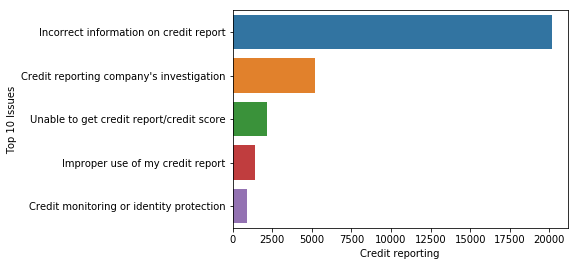

<Figure size 504x360 with 0 Axes>

Index(['Billing disputes', 'Other', 'Identity theft / Fraud / Embezzlement',
       'Closing/Cancelling account', 'Customer service / Customer relations',
       'Rewards', 'Delinquent account', 'Advertising and marketing',
       'APR or interest rate', 'Late fee'],
      dtype='object')


[Text(0,0.5,'Top 10 Issues'), Text(0.5,0,'Credit card')]

<Figure size 504x360 with 0 Axes>

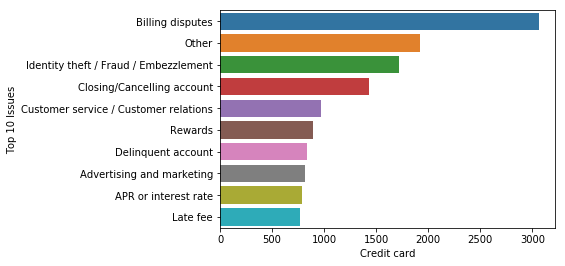

<Figure size 504x360 with 0 Axes>

Index(['Dealing with my lender or servicer',
       'Dealing with your lender or servicer', 'Can't repay my loan',
       'Struggling to repay your loan', 'Getting a loan',
       'Incorrect information on your report',
       'Problem with a credit reporting company's investigation into an existing problem',
       'Credit monitoring or identity theft protection services',
       'Improper use of your report',
       'Unable to get your credit report or credit score'],
      dtype='object')


[Text(0,0.5,'Top 10 Issues'), Text(0.5,0,'Student loan')]

<Figure size 504x360 with 0 Axes>

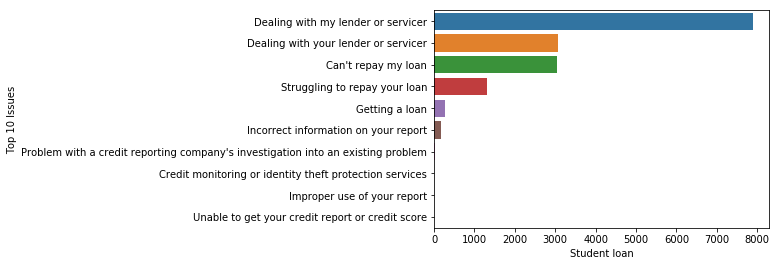

<Figure size 504x360 with 0 Axes>

In [13]:
########my way to plot#####
for product in products_name:
    mydata = df2[df2['product'] == product]
    
    mygraph = sns.countplot(y = "issue", data = mydata , \
              order = mydata.issue.value_counts()[:10].index)
    
    print(mydata.issue.value_counts()[:10].index)
        
    mygraph.set(xlabel = product, ylabel = "Top 10 Issues")
    plt.figure(figsize=(7,5))
    plt.show()

#### Take a look at the relationship between company and issue

In [ ]:
#Plot complaints amounts by company
sns.countplot(y = "company", data = df2, \
              order = df2.company.value_counts()[:20].index)
plt.show()

- The histogram shows  top 20 companies with highest complaints amount.

In [ ]:
#Focus on top 6 companies with hightes complaints
top6company = ['EQUIFAX, INC.','TRANSUNION INTERMEDIATE HOLDINGS, INC.',\
               'Experian Information Solutions Inc.','WELLS FARGO & COMPANY',\
               'BANK OF AMERICA, NATIONAL ASSOCIATION', 'CITIBANK, N.A.']

#Find the issues of the 6 companies
top6company_issue = df2[df2.company.isin(top6company)].issue.value_counts()
top6company_issue

In [ ]:
#Visualize top 6 issues for each top 6 companies 
for company in top6company:
    mydata = df2[df2['company'] == company]
    mygraph = sns.countplot(y = "issue", data = mydata , \
              order = mydata.issue.value_counts()[:10].index)
    mygraph.set(xlabel = company, ylabel = "Top 10 Issues")
    plt.show()

#### Take a look at the complaints amount by timeline for top 6 companies

In [ ]:
#Define a function to convert the "objective" into "datetime"
import datetime

def converttime(j):
    j=j.split("T")[0] #"date received" format: "2017-11-26T00:00:00.000"
    j=datetime.datetime.strptime(j, '%Y-%m-%d')
    
    return j

In [ ]:
#Apply funtion into the column
df2['date_received'] = df2['date_received'].apply(converttime)
df2['date_received'].head()

In [ ]:
#df2['Qtr'] = df2.date_received.dt.quarter

#Add a column "Qtr" indicates the quarter of the year
df2['Qtr'] = pd.PeriodIndex(df2.date_received, freq='Q')
df2['Qtr'].head()

In [ ]:
#Subset of top6companies
top6company_df = df2[df2.company.isin(top6company)]
top6company_df
#Group by "company" and "Qtr"
G = top6company_df.groupby(['company','Qtr']).size()
comp_groupby_Q =  pd.DataFrame(G)
comp_groupby_Q.columns = ['Complaint Amount']
comp_groupby_Q

In [ ]:
#Plot the timeline
fig, ax = plt.subplots(figsize=(15,7))
comp_groupby_Q['Complaint Amount'].unstack(level = 0).plot(ax=ax)
plt.show()

#### Text visualization

In [ ]:
#Import package to preprocess text 
import nltk, re, string
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [ ]:
#Extract all narratives
all_narratives = df2['narratives'].tolist()
# all_narratives[:10]

In [ ]:
#Tokenize all narratives
text = " ".join(all_narratives).lower()
tokens = nltk.word_tokenize(text)

#Extract all tokens which are not in stop_words and punctuation
my_tokens = [token.strip() for token in tokens\
             if token.strip() not in stop_words\
            and token.strip() not in string.punctuation]

#Stemming all tokens
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
stem_tokens = [porter_stemmer.stem(my_token) for my_token in my_tokens]

#Remove non-English words
words = set(nltk.corpus.words.words())
final_tokens=[token for token in stem_tokens if token in words]
# final_tokens

In [ ]:
#Get the word frequency 
word_freq = nltk.FreqDist(final_tokens)
# word_freq

In [ ]:
#word_freq_df = pd.DataFrame.from_dict(word_freq, orient = 'index')
#word_freq_df.columns = ['count']
#word_freq_df.sort_values(by = 'count', ascending = False).plot.bar()
#plt.show()

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate_from_frequencies(frequencies = word_freq)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [11]:
import nltk, re, string
from nltk.corpus import stopwords
from wordcloud import WordCloud

def word_cloud (file,company=None):
    
    #Extract narratives
    if company in list(file.company.unique()):
        all_narratives = file[file['company']== company]['narratives'].tolist()
    else:
        all_narratives = file['narratives'].tolist()
        
    #Tokenize all narratives
    text = " ".join(all_narratives).lower()
    tokens = nltk.word_tokenize(text)
    
    #stop words
    stop_words = stopwords.words('english')

    #Extract all tokens which are not in stop_words and punctuation
    my_tokens = [token.strip() for token in tokens\
                 if token.strip() not in stop_words\
                and token.strip() not in string.punctuation]

    #Stemming all tokens
    from nltk.stem.porter import PorterStemmer
    porter_stemmer = PorterStemmer()
    stem_tokens = [porter_stemmer.stem(my_token) for my_token in my_tokens]

    #Remove non-English words
    words = set(nltk.corpus.words.words())
    final_tokens=[token for token in stem_tokens if token in words]
    
    #Get the word frequency 
    word_freq = nltk.FreqDist(final_tokens)
    
    #plot
    wordcloud = WordCloud().generate_from_frequencies(frequencies = word_freq)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


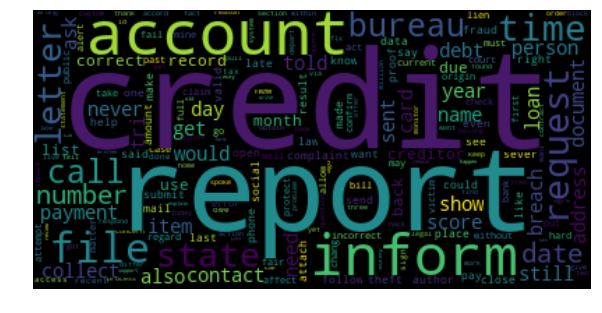

In [13]:
word_cloud(df2,company='EQUIFAX, INC.')

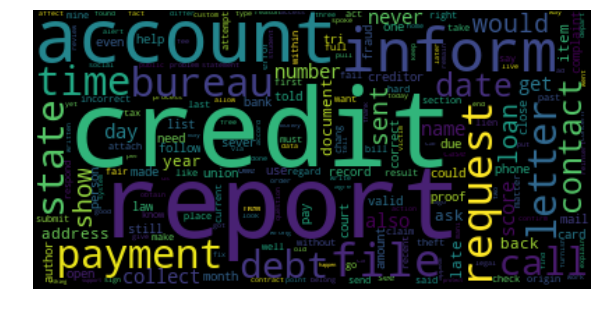

In [12]:
word_cloud(df2,company='TRANSUNION INTERMEDIATE HOLDINGS, INC.')

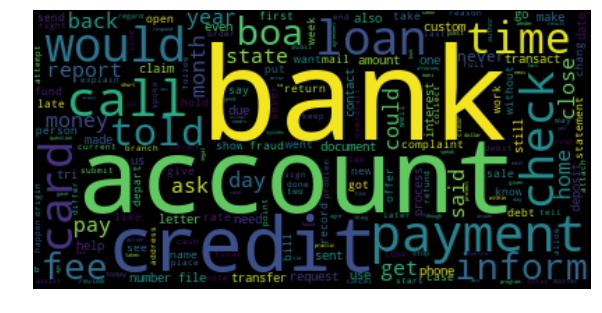

In [14]:
word_cloud(df2,company='BANK OF AMERICA, NATIONAL ASSOCIATION')

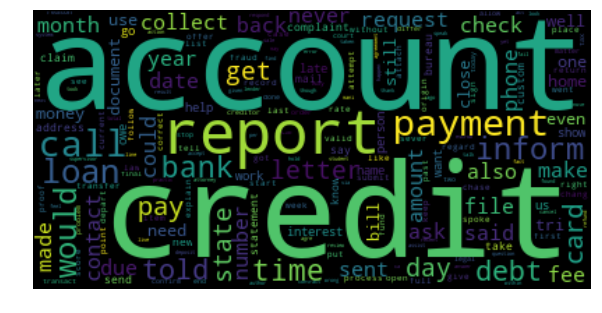

In [15]:
word_cloud(df2)

In [ ]:
df.iloc[:1000,:].to_csv("Sample_Comsumer_Complaints.csv")